In [1]:
import pandas as pd
from IPython.core.display import display

### Inkomensvragenlijst
De UCI Machine Learning Repository bevat verschillende datasets, ook de zogenaamde AdultUCI dataset. Dit is een dataset me een vragenlijst rond die een aanzienlijk aantal respondenten hebben ingevuld over het inkomen. Het bevat naast een aanwijzing van het inkomensniveau ook enkele andere attributen. Voor we die kunnen gebruiken moet je nog wat aanpassingen doen aan de data. Het hoofdstuk datamanagement uit Data Science 1 komt hier dus van pas.

---

1. Gebruik Pandas om deze gegevens (adultUCI.csv, zie Canvas) in te lezen als dataframe met de naam adultUCI.

In [2]:
import pandas as pd

adultUCI = pd.read_csv('adultUCI.csv',sep=';')

---

2. Inspecteer de dataset.

In [3]:
display(adultUCI.head())
display(adultUCI.describe())
display(adultUCI.info())

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,small
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,small
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,small
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,small
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,small


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


None

---

3. Verwijder volgende kolommen uit het dataframe: fnlwgt, education-num, capitalgain, capitalloss.

In [4]:
adultUCI = adultUCI.drop(columns=['fnlwgt','education-num','capital-gain','capital-loss'])

---

4. Met numerieke gegevens kan je niet werken. Daarom zullen we de numerieke kolommen omzetten naar categorieën:

    * Zet de agekolom om naar klassen. De bins van de klassen zijn 15,25,45,65,100. Zet de klassen om naar een Categorical met factoren "Young", "Middle-aged", "Senior", "Old".

    * Zet de hours-per-week kolom om naar klassen. De bins van de klassen zijn 0,25,40,60,168. Zet de klassen om naar een Categorical met factoren "Part-time", "Full-time", "Over-time", "Workaholic"

In [5]:
adultUCI['age'] = pd.cut(adultUCI['age'], bins=[15,25,45,65,100]).cat.rename_categories(['Young','Middle-aged','Senior','Old'])

adultUCI['hours-per-week'] = pd.cut(adultUCI['hours-per-week'], bins=[0,25,40,60,168]).cat.rename_categories(['Part-time', 'Full-time', 'Over-time', 'Workaholic'])


---
De mlxtend package kan ook goed omgaan met nominale gegevens. Als de gegevens in je dataframe factoren zijn met enkele waarden dan kun je die gewoon gebruiken. Elke mogelijke waarde wordt in dit geval als een afzonderlijk item beschouwd. Zo zijn er vier items voor age: age=Middle-aged, age=Young, age=Senior, age=Old.

5. Zet het dataframe om naar een transactioneel formaat met Pandas <code>get_dummies</code> functie. Gebruik hierbij ook de parameter <code>prefix_sep='='</code>. Bekijk het resultaat.

In [6]:
transacties = pd.get_dummies(adultUCI, prefix_sep='=')
transacties.head()

,age=Young,age=Middle-aged,age=Senior,age=Old,workclass=Federal-gov,workclass=Local-gov,workclass=Never-worked,workclass=Private,workclass=Self-emp-inc,workclass=Self-emp-not-inc,...,native-country=Scotland,native-country=South,native-country=Taiwan,native-country=Thailand,native-country=Trinadad&Tobago,native-country=United-States,native-country=Vietnam,native-country=Yugoslavia,income=large,income=small
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
2,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


---
6. Maak een staafdiagramma van alle items met een support van 0.1 of meer (zie help).

<AxesSubplot:xlabel='itemsets'>

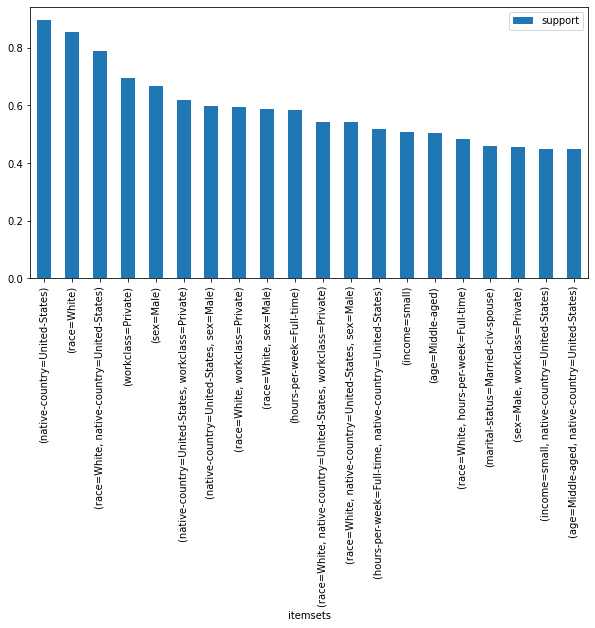

In [7]:
from mlxtend.frequent_patterns import fpgrowth
itemsets = fpgrowth(transacties, min_support=0.1,use_colnames=True)
items_support = itemsets[itemsets['support'] >= 0.1] # in feite overbodig wegens vorige regel
items_support.sort_values(by='support',ascending=False)[:20].plot.bar(x='itemsets', figsize=(10,5))

---

7. Welke twee items hebben een zeer hoge support? Kan je hieruit besluiten dat de afgenomen vragenlijst een goed voorbeeld van een aselecte steekproef (zie hoofdstuk introductie)?

In [8]:
items_support.head(2)
# United States, White. Blanken zijn oververtegenwoordigd in de dataset.
# Zie https://en.wikipedia.org/wiki/Race_and_ethnicity_in_the_United_States voor de werkelijke verdeling volgens ras in Amerika.

,support,itemsets
0,0.897424,(native-country=United-States)
1,0.855043,(race=White)


---

8. Pas het apriori en de association_rules algoritmes toe met volgende parameters:
    * support = 0.05,
    * confidence = 0.6,
    * minlen=2 en maxlen=3

Je kunt hiervoor gebruik maken van volgende filterfunctie in combinatie met de <code>.apply</code>-functie van een DataFrame:

```python
def rule_filter(row, minlen, maxlen):
    length = len(row['antecedents']) + len(row['consequents'])
    return minlen <= length <= maxlen
```
In de <a href='https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html'>documentatie van Pandas</a> vind je een voorbeeld van het gebruik de <code>.apply</code>-functie. Vergeet het <code>axis=1</code> argument niet.

Hoeveel regels heeft het <code>association_rules</code> algoritme gevonden?

In [9]:
from mlxtend.frequent_patterns import association_rules
itemsets = fpgrowth(transacties, min_support=0.05, use_colnames=True)
rules = association_rules(itemsets, metric='confidence', min_threshold=0.6)

def rule_filter(row, minlen, maxlen):
    length = len(row['antecedents']) + len(row['consequents'])
    return minlen <= length <= maxlen

## FILTER OP confidence
result = rules[rules.apply(lambda row: rule_filter(row, 2, 3), axis=1)].sort_values(by='confidence', ascending=False)

print('Gevonden regels {}'.format(result.shape[0]))

Gevonden regels 1112


---

9. Bekijk de regels met de hoogste confidence? Wat valt er op?

In [10]:
# Bijna al deze regels gaan over de items Husband, Male.
display(result.head(10))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8197,"(education=Some-college, relationship=Husband)",(sex=Male),0.074895,0.668482,0.074895,1.000000,1.495926,0.024829,inf
4075,"(relationship=Husband, occupation=Exec-manager...",(marital-status=Married-civ-spouse),0.066152,0.458192,0.066152,1.000000,2.182493,0.035842,inf
4076,"(relationship=Husband, occupation=Exec-manager...",(sex=Male),0.066152,0.668482,0.066152,1.000000,1.495926,0.021931,inf
5864,"(occupation=Prof-specialty, relationship=Husband)",(sex=Male),0.055137,0.668482,0.055137,1.000000,1.495926,0.018279,inf
7140,"(relationship=Husband, income=large)",(sex=Male),0.121166,0.668482,0.121166,1.000000,1.495926,0.040169,inf
6118,"(hours-per-week=Over-time, relationship=Husband)",(sex=Male),0.147230,0.668482,0.147230,1.000000,1.495926,0.048809,inf
9520,"(relationship=Husband, occupation=Craft-repair)",(sex=Male),0.076389,0.668482,0.076389,1.000000,1.495926,0.025324,inf
3505,"(age=Senior, relationship=Husband)",(sex=Male),0.147987,0.668482,0.147987,1.000000,1.495926,0.049060,inf
1160,"(relationship=Husband, education=Bachelors)",(sex=Male),0.074444,0.668482,0.074444,1.000000,1.495926,0.024680,inf
1753,(relationship=Husband),(sex=Male),0.403669,0.668482,0.403648,0.999949,1.495851,0.133803,6536.208018


---

10. Kan je verklaren waarom er in dit geval zo’n hoge confidence is?

In [11]:
# Op zich is het dan logisch dat de confidence 1 is. Alle Husbands zullen inderdaad aangeven dat ze Man zijn.

---

11. Die regel en variaties op die regel zijn vrij nutteloos. Verwijder daarom de kolom “relationship”

In [12]:
transacties2 = pd.get_dummies(adultUCI.drop(columns=['relationship']), prefix_sep='=')

---

12. Voer het apriori algoritme opnieuw uit. Welke regel heeft nu de grootste confidence?

In [13]:
itemsets2 = fpgrowth(transacties2, min_support=0.05,use_colnames=True)
rules2 = association_rules(itemsets2, metric='confidence', min_threshold=0.6)

In [14]:
result2 = rules2[rules2.apply(lambda row: rule_filter(row, 2, 3), axis=1)].sort_values(by='confidence', ascending=False)
result2.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4145,"(marital-status=Married-civ-spouse, occupation...",(sex=Male),0.078170,0.668482,0.077147,0.986904,1.476336,0.024891,25.314711
4246,"(race=White, occupation=Craft-repair)",(sex=Male),0.112690,0.668482,0.107653,0.955305,1.429066,0.032322,7.417377
4211,"(age=Middle-aged, occupation=Craft-repair)",(sex=Male),0.074813,0.668482,0.071455,0.955118,1.428786,0.021444,7.386382
4294,(occupation=Machine-op-inspct),(workclass=Private),0.061873,0.694198,0.059007,0.953673,1.373777,0.016055,6.600963
1609,"(hours-per-week=Part-time, age=Young)",(marital-status=Never-married),0.057717,0.329982,0.055014,0.953175,2.888563,0.035969,14.308937
1626,"(native-country=United-States, workclass=Self-...",(race=White),0.071864,0.855043,0.068220,0.949288,1.110223,0.006773,2.858426
3511,"(race=White, education=Some-college)",(native-country=United-States),0.190185,0.897424,0.180418,0.948649,1.057080,0.009742,1.997537
4249,"(native-country=United-States, occupation=Craf...",(sex=Male),0.112669,0.668482,0.106814,0.948028,1.418181,0.031496,6.378823
2257,"(race=White, marital-status=Divorced)",(native-country=United-States),0.116375,0.897424,0.110315,0.947924,1.056272,0.005877,1.969730
3995,"(race=White, occupation=Sales)",(native-country=United-States),0.100528,0.897424,0.095246,0.947454,1.055748,0.005029,1.952118


---

13. Als je van deze regel de lift bekijkt zou je deze dan nog steeds in overweging nemen als goede association rule? Waarom?

In [15]:
# Ja.  De lift (1.476336) ligt ver boven de 1. Dit wil zeggen dat er meer kans is dat iemand sex=Male heeft ingevuld als hij ook marital-status=Married-civ-spouse,occupation=Craft-repair heeft ingevuld dan dat er in de volledige dataset sex=Male hebben ingevuld

---

14. Als een respodent invult dat hij overuren klopt (hours-per-week) en een beperkt inkomen heeft in welke leeftijdscategorie kunnen we dan verwachten dat hij zit? Hoe zeker ben je daarvan?

In [16]:
result2[result2['antecedents'].apply(lambda x: 'Over-time' in str(x) and 'income=small' in str(x))]
# (age=Middle-aged)
# De confidence is 0.616.
# Dat wil zeggen dat als hij heeft aangegeven dat hij een bescheiden inkomen heeft en dat hij overuren presteerd dat hij dan in ongeveer 62% van de gevallen heeft aangegeven dat hij middle-aged was.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2962,"(income=small, hours-per-week=Over-time)",(native-country=United-States),0.10276,0.897424,0.093383,0.908747,1.012617,0.001163,1.124077
2966,"(income=small, hours-per-week=Over-time)",(race=White),0.10276,0.855043,0.092748,0.902570,1.055585,0.004884,1.487812
2963,"(income=small, hours-per-week=Over-time)",(sex=Male),0.10276,0.668482,0.077618,0.755330,1.129918,0.008924,1.354958
2964,"(income=small, hours-per-week=Over-time)",(workclass=Private),0.10276,0.694198,0.073072,0.711098,1.024345,0.001737,1.058498
2965,"(income=small, hours-per-week=Over-time)",(age=Middle-aged),0.10276,0.505119,0.063306,0.616059,1.219632,0.011400,1.288952


---
15. Beschrijf wat de lift zegt van de in 14 gebruikte regel.

In [17]:
# De lift is 1.219.
# Dat wil zeggen dat we doordat we weten dat de respondent Over-time
# en income=small heeft ingevuld we er zekerder van geworden zijn
# dat hij ook age=Middle-aged zal invullen

---
16. Komt de combinatie van de drie items uit vorige 2 vragen vaak voor? Welk getal heb je hiervoor gebruikt?

In [18]:
# De combinatie heeft een support van 0.063306 en komt dus 6.3306% keer voor in de dataset.

---
17. Kom je ergens een regel tegen met hours-per-week=Workaholic? Kun je verklaren waarom dit zo is?

In [19]:
# Deze komt niet voor omdat de support van Workaholic kleiner is dan de minimum support van 0.05 die we hebben opgegeven.
# Daarom werden er met Workaholic geen rules gemaakt